In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
size=25
ly=[0]
x=[0]
r=2.5
y=np.zeros(size)
y[0]=0.01

In [16]:
for n in range(size-1):
    y[n+1]=r*y[n]*(1-y[n])
    ly.append(y[n])
    x.append(n)    

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [0, 0.01, 0.02475, 0.060343593749999994, 0.14175561110833737, 0.304152394569098, 0.5291092886174543, 0.6228816232904644, 0.587250266643751, 0.6059684774264859, 0.5969267044797809, 0.601513034896723, 0.5992377593651417, 0.6003796677904656, 0.5998098057356894, 0.6000950066975098, 0.5999524740855636, 0.6000237573104369, 0.599988119933757, 0.6000059396802816, 0.5999970300716597, 0.600001484942119, 0.5999992575234279, 0.6000003712369079, 0.5999998143812015]


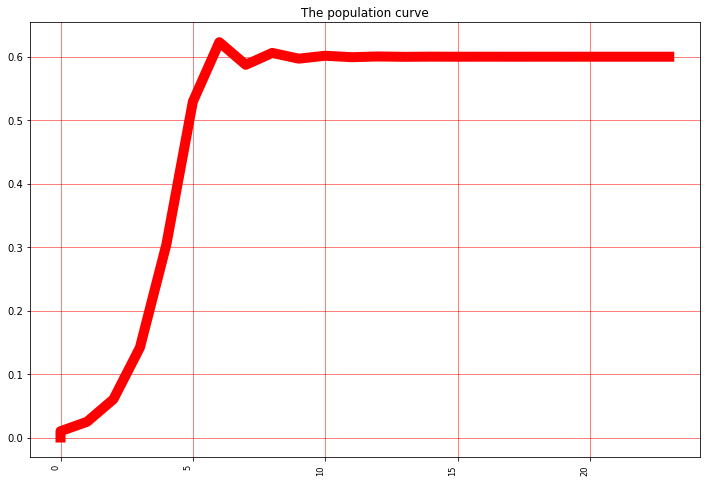

In [17]:
fig, ax = plt.subplots(1,figsize=(12,8))
ax=plt.axes()
ax.set_axisbelow(True)
ax.set_title("The population curve")
plt.xticks(
   rotation=90,
   horizontalalignment ='right',
   fontweight ='light',
    fontsize='small',)
ax.grid(which ='major',linestyle='-',linewidth='0.5',color='red')
ax.grid(which ='minor',linestyle=':',linewidth='0.5',color='black')
plt.plot(x,ly,linewidth=10,color='red')
print(x,ly)

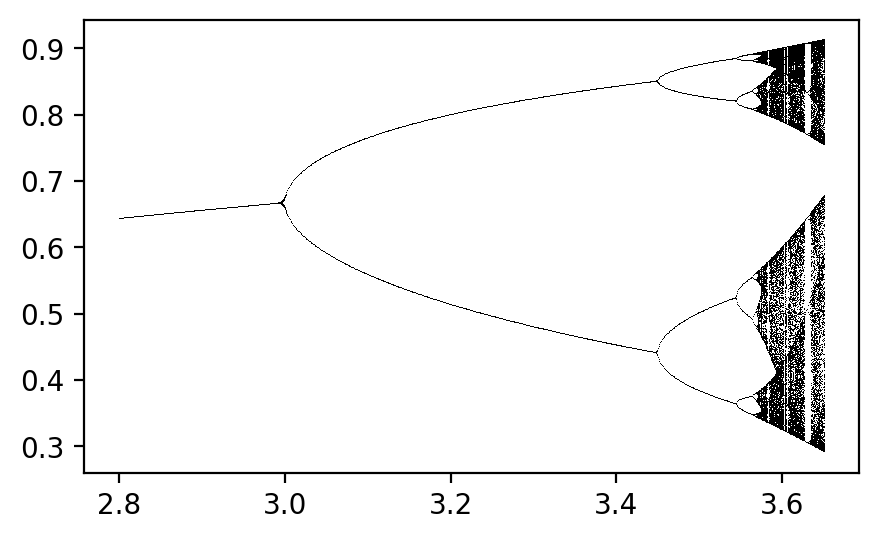

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numba

@numba.jit(nopython=True, parallel=True)
def calc():
  # Parameters
  min_r = 2.8
  max_r = 3.65
  step_r = 0.001
  max_iterations = 1000
  skip_iterations = 500
  max_counter = int((max_iterations - skip_iterations) * (max_r - min_r) / step_r)
  # The x and r results will be stored in these two arrays
  result_x = np.zeros(max_counter)
  result_r = np.zeros(max_counter)
  # Start the main loop
  i = 0
  for r in np.arange(min_r, max_r, step_r):
    x = 0.1
    for it in range(max_iterations):
      x = r * x * (1-x)
      if it > skip_iterations:
        result_x[i] = x
        result_r[i] = r
        i += 1
  result_x = result_x[result_r != 0].copy()
  result_r = result_r[result_r != 0].copy()
  return result_x, result_r

result_x, result_r = calc()

# Plot
plt.figure(figsize=(5, 3), dpi=200)
plt.plot(result_r, result_x, ",", color='k')
plt.show()